In [28]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/Student_Depression_Cleaned.csv", sep=',')

df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Family History of Mental Illness,Depression,Weighted Stress,Quality of Life,Efficiency,Risk Group,Academic_Work_Interaction,Academic_Financial_Interaction,Work_Financial_Interaction,Study_CGPA_Interaction
0,2,2,5.0,8.97,2.0,2,3,2,1,3.0,...,0,1,3.4,2.3,2.2425,0,15.0,5.0,3.0,17.94
1,1,1,2.0,5.90,5.0,2,2,2,0,3.0,...,1,0,2.0,2.9,1.4750,0,6.0,4.0,6.0,29.50
2,2,2,3.0,7.03,5.0,1,3,2,0,9.0,...,1,0,2.2,2.8,0.7030,0,27.0,3.0,9.0,35.15
3,1,2,3.0,5.59,2.0,3,2,2,1,4.0,...,1,1,3.8,2.4,1.1180,1,12.0,15.0,20.0,11.18
4,1,2,4.0,8.13,3.0,2,2,3,1,1.0,...,0,0,2.8,2.3,4.0650,0,4.0,4.0,1.0,24.39


In [29]:
from sklearn.model_selection import train_test_split

features = [
    'Academic Pressure', 'Have you ever had suicidal thoughts ?','Weighted Stress','Academic_Work_Interaction',
    'Financial Stress','Risk Group','Academic_Financial_Interaction','Work_Financial_Interaction',
]

X = df[features]
y = df['Depression']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2698)

print("Tamanho treino: " + str(len(x_train)))
print("Tamanho teste: " + str(len(x_test)))

Tamanho treino: 22266
Tamanho teste: 5567


### 2. Construir Árvore de Decisão

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(x_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(x_test))))
print(classification_report(y_test, clf.predict(x_test)))

Ein: 0.1609
Eout: 0.1782
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2294
           1       0.84      0.86      0.85      3273

    accuracy                           0.82      5567
   macro avg       0.82      0.81      0.82      5567
weighted avg       0.82      0.82      0.82      5567



### 3. Plotar Árvore e Analisar Overfitting

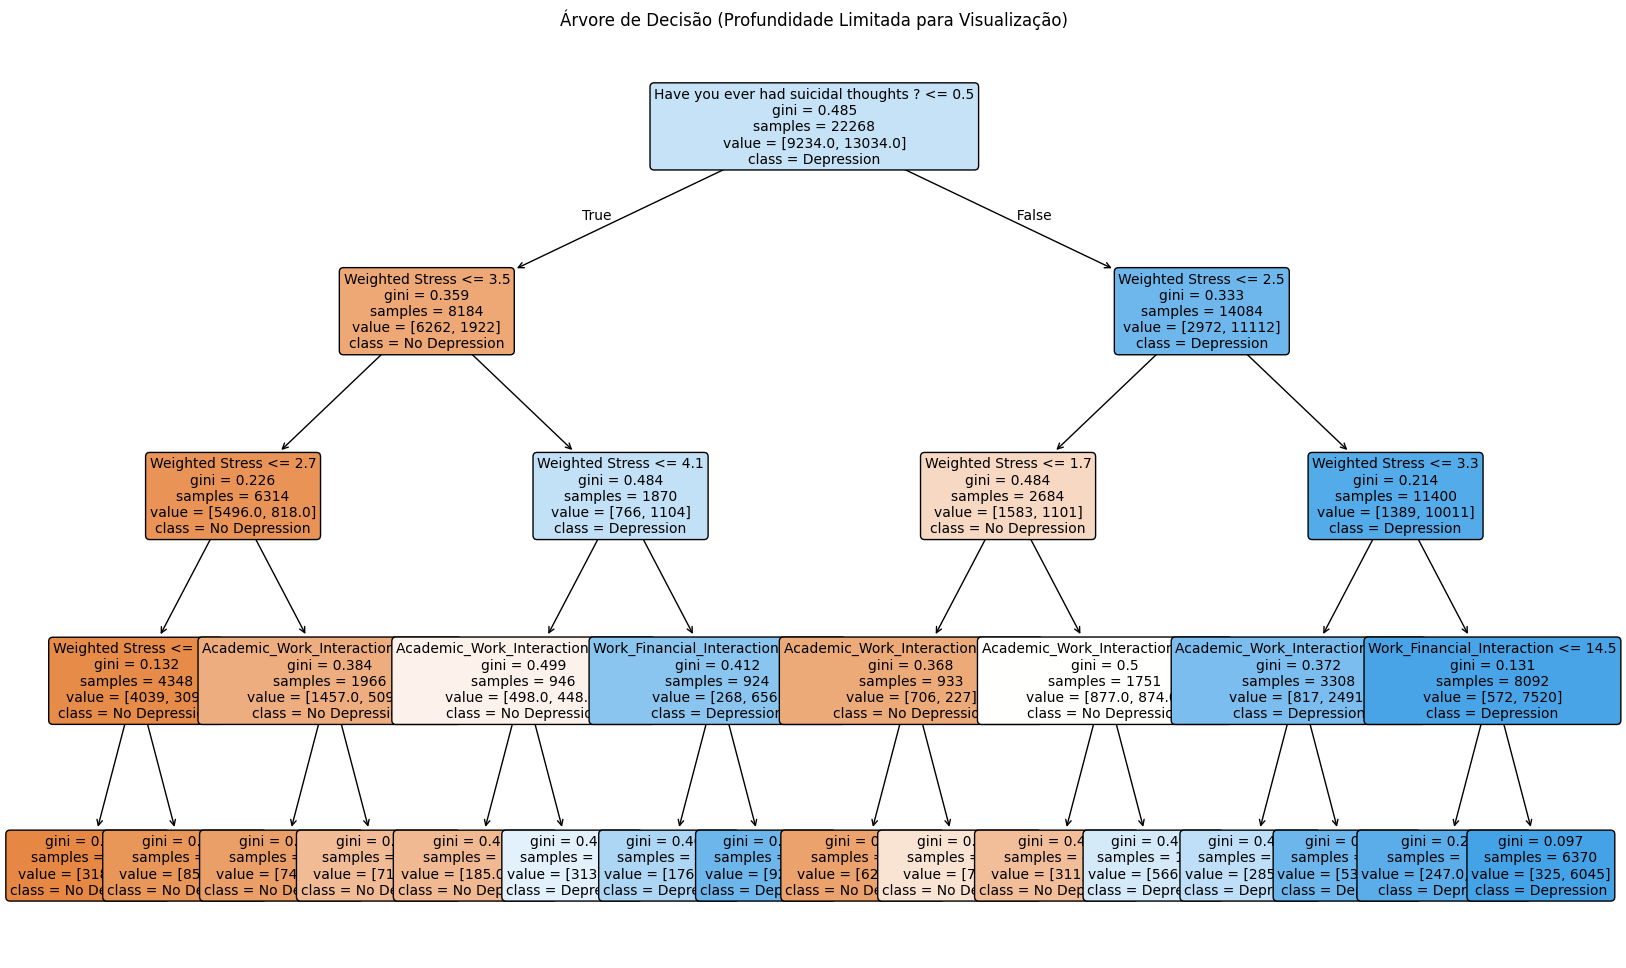

=== Análise de Overfitting ===
Ein: 0.1618
Eout: 0.1765
Diferença (Ein - Eout): -0.0147
Possível overfitting detectado!


In [15]:
from sklearn.tree import plot_tree

# Criar uma árvore menor para visualização (limitando profundidade)
clf_visual = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_visual.fit(x_train, y_train)

plt.figure(figsize=(20, 12))
plot_tree(clf_visual, 
          feature_names=x_train.columns,
          class_names=['No Depression', 'Depression'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Árvore de Decisão (Profundidade Limitada para Visualização)')
plt.show()

# Analisar overfitting com a árvore completa
print("=== Análise de Overfitting ===")
print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(x_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(x_test))))
print(f'Diferença (Ein - Eout): {(1 - accuracy_score(y_train, clf.predict(x_train))) - (1 - accuracy_score(y_test, clf.predict(x_test))):.4f}')

if (1 - accuracy_score(y_train, clf.predict(x_train))) < (1 - accuracy_score(y_test, clf.predict(x_test))):
    print("Possível overfitting detectado!")
else:
    print("Sem overfitting significativo.")

### 4. Cost-Complexity com Cross Validation

Número de valores de alpha testados: 726
Range de alpha: 0.000000 a 0.142753


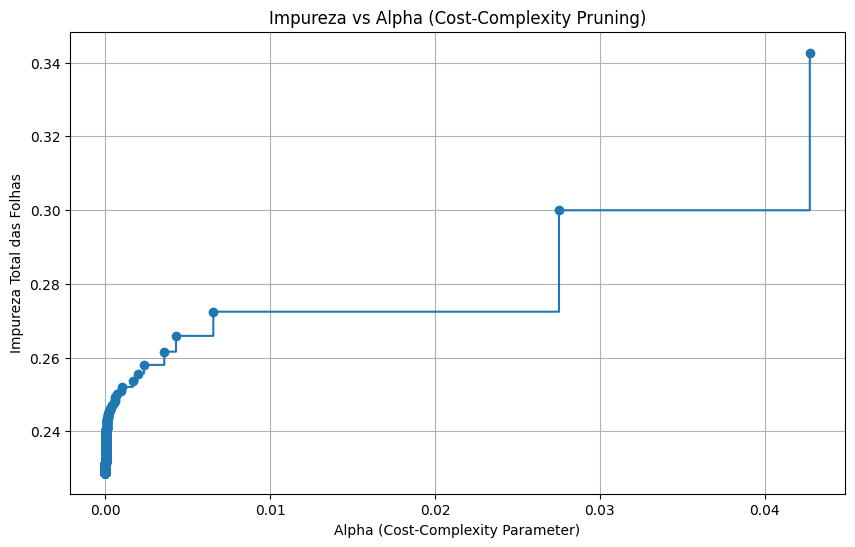

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Obter os valores de alpha para cost-complexity pruning
clf_full = DecisionTreeClassifier(random_state=42)
path = clf_full.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(f"Número de valores de alpha testados: {len(ccp_alphas)}")
print(f"Range de alpha: {ccp_alphas[0]:.6f} a {ccp_alphas[-1]:.6f}")

# Plotar impureza vs alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Alpha (Cost-Complexity Parameter)")
plt.ylabel("Impureza Total das Folhas")
plt.title("Impureza vs Alpha (Cost-Complexity Pruning)")
plt.grid(True)
plt.show()

### 5. Cross Validation para Encontrar o Melhor Alpha

Número de folds para CV: 10
Número de alphas válidos: 724
Testando diferentes valores de alpha...
Alpha 0.000000: CV Score = 0.8202 (+/- 0.0096)
Alpha 0.000000: CV Score = 0.8202 (+/- 0.0096)
Alpha 0.000000: CV Score = 0.8202 (+/- 0.0096)
Alpha 0.000000: CV Score = 0.8202 (+/- 0.0096)
Alpha 0.000001: CV Score = 0.8205 (+/- 0.0096)
Alpha 0.000002: CV Score = 0.8207 (+/- 0.0098)
Alpha 0.000003: CV Score = 0.8209 (+/- 0.0093)
Alpha 0.000004: CV Score = 0.8209 (+/- 0.0095)
Alpha 0.000006: CV Score = 0.8214 (+/- 0.0092)
Alpha 0.000008: CV Score = 0.8218 (+/- 0.0100)
Alpha 0.000012: CV Score = 0.8229 (+/- 0.0101)
Alpha 0.000018: CV Score = 0.8238 (+/- 0.0128)
Alpha 0.000029: CV Score = 0.8231 (+/- 0.0128)
Alpha 0.000050: CV Score = 0.8233 (+/- 0.0128)
Alpha 0.000193: CV Score = 0.8273 (+/- 0.0125)

Melhor alpha: 0.000298
Melhor CV score: 0.8286


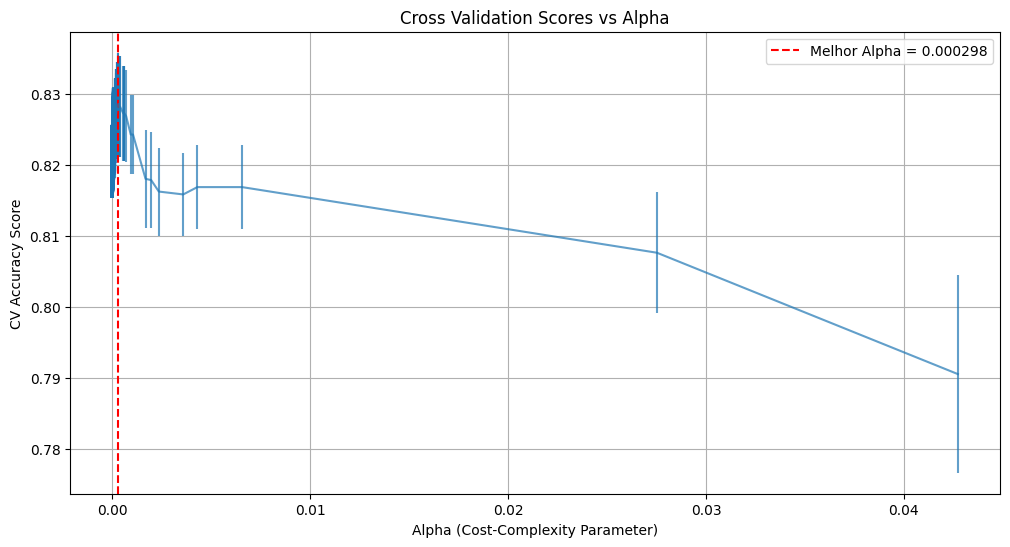

In [18]:
# Cross validation para cada alpha
# Definir número de folds baseado na dimensão do conjunto de treino
n_folds = min(10, len(x_train) // 100)  # Máximo 10 folds ou baseado no tamanho do dataset
print(f"Número de folds para CV: {n_folds}")

cv_scores = []
cv_scores_std = []

# Filtrar apenas alphas não-negativos para evitar erro
valid_alphas = ccp_alphas[ccp_alphas >= 0][:-1]  # Excluir valores negativos e o último alpha (árvore vazia)
print(f"Número de alphas válidos: {len(valid_alphas)}")

print("Testando diferentes valores de alpha...")
for i, alpha in enumerate(valid_alphas):
    clf_alpha = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    scores = cross_val_score(clf_alpha, x_train, y_train, cv=n_folds, scoring='accuracy')
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())
    
    if i % 50 == 0:  # Print a cada 50 iterações
        print(f"Alpha {alpha:.6f}: CV Score = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Encontrar o melhor alpha
best_alpha_idx = np.argmax(cv_scores)
best_alpha = valid_alphas[best_alpha_idx]
best_score = cv_scores[best_alpha_idx]

print(f"\nMelhor alpha: {best_alpha:.6f}")
print(f"Melhor CV score: {best_score:.4f}")

# Plotar CV scores vs alpha
plt.figure(figsize=(12, 6))
plt.errorbar(valid_alphas, cv_scores, yerr=cv_scores_std, alpha=0.7)
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Melhor Alpha = {best_alpha:.6f}')
plt.xlabel("Alpha (Cost-Complexity Parameter)")
plt.ylabel("CV Accuracy Score")
plt.title("Cross Validation Scores vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

### 6.  Construir e Avaliar a Melhor Árvore

Número de nós na árvore otimizada: 41


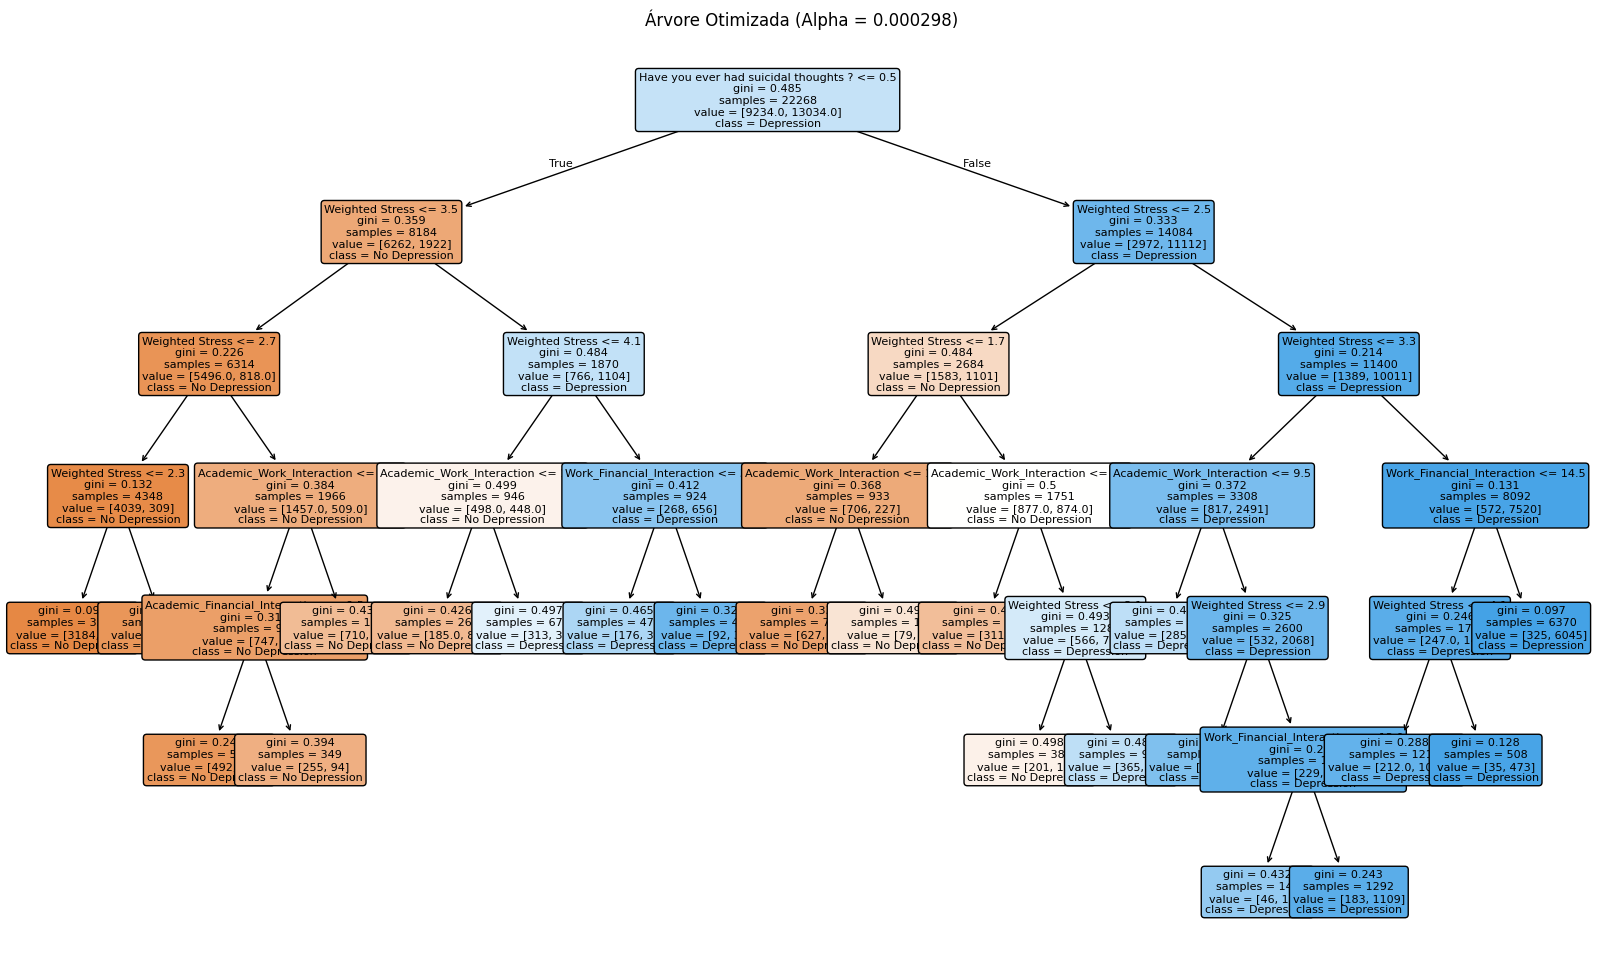

=== Métricas da Melhor Árvore ===
Ein: 0.1703
Eout: 0.1719

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      2304
           1       0.83      0.89      0.86      3264

    accuracy                           0.83      5568
   macro avg       0.83      0.82      0.82      5568
weighted avg       0.83      0.83      0.83      5568



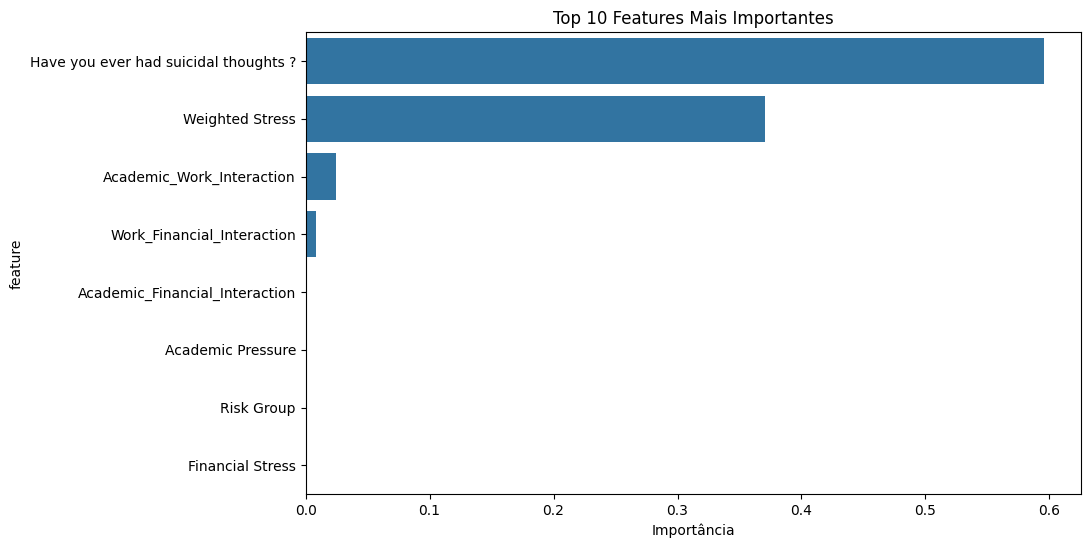


=== Feature Importance ===
                                 feature  importance
1  Have you ever had suicidal thoughts ?    0.595465
2                        Weighted Stress    0.370910
3              Academic_Work_Interaction    0.024301
7             Work_Financial_Interaction    0.008082
6         Academic_Financial_Interaction    0.001242
0                      Academic Pressure    0.000000
5                             Risk Group    0.000000
4                       Financial Stress    0.000000


In [19]:
# Treinar a árvore com o melhor alpha
best_clf = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
best_clf.fit(x_train, y_train)

# Plotar a árvore otimizada (se não for muito grande)
n_nodes = best_clf.tree_.node_count
print(f"Número de nós na árvore otimizada: {n_nodes}")

if n_nodes <= 50:  # Só plotar se a árvore não for muito grande
    plt.figure(figsize=(20, 12))
    plot_tree(best_clf,
              feature_names=x_train.columns,
              class_names=['No Depression', 'Depression'],
              filled=True,
              rounded=True,
              fontsize=8)
    plt.title(f'Árvore Otimizada (Alpha = {best_alpha:.6f})')
    plt.show()
else:
    print("Árvore muito grande para visualização completa.")
    # Plotar apenas os primeiros níveis
    plt.figure(figsize=(20, 12))
    plot_tree(best_clf,
              feature_names=x_train.columns,
              class_names=['No Depression', 'Depression'],
              filled=True,
              rounded=True,
              fontsize=8,
              max_depth=3)
    plt.title(f'Árvore Otimizada - Primeiros 3 Níveis (Alpha = {best_alpha:.6f})')
    plt.show()

# Computar métricas da melhor árvore
print("=== Métricas da Melhor Árvore ===")
print('Ein: %0.4f' % (1 - accuracy_score(y_train, best_clf.predict(x_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, best_clf.predict(x_test))))

print("\n=== Classification Report ===")
print(classification_report(y_test, best_clf.predict(x_test)))

# Importância das features
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': best_clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Features Mais Importantes')
plt.xlabel('Importância')
plt.show()

print("\n=== Feature Importance ===")
print(feature_importance)

In [ ]:
# Comparar árvore original vs otimizada
print("=== Comparação: Árvore Original vs Otimizada ===")
print(f"Árvore Original - Ein: {1 - accuracy_score(y_train, clf.predict(x_train)):.4f}, Eout: {1 - accuracy_score(y_test, clf.predict(x_test)):.4f}")
print(f"Árvore Otimizada - Ein: {1 - accuracy_score(y_train, best_clf.predict(x_train)):.4f}, Eout: {1 - accuracy_score(y_test, best_clf.predict(x_test)):.4f}")

print("\nNúmero de nós:")
print(f"Árvore Original: {clf.tree_.node_count}")
print(f"Árvore Otimizada: {best_clf.tree_.node_count}")

print("\nProfundidade:")
print(f"Árvore Original: {clf.tree_.max_depth}")
print(f"Árvore Otimizada: {best_clf.tree_.max_depth}")

=== Comparação: Árvore Original vs Otimizada ===
Árvore Original - Ein: 0.1618, Eout: 0.1765
Árvore Otimizada - Ein: 0.1703, Eout: 0.1719

Número de nós:
Árvore Original: 1955
Árvore Otimizada: 41

Profundidade:
Árvore Original: 33
Árvore Otimizada: 6


In [21]:
from sklearn.model_selection import GridSearchCV

# Grid search para encontrar melhores hiperparâmetros
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor score: {grid_search.best_score_:.4f}")

# Usar os melhores parâmetros
best_tree = grid_search.best_estimator_

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor score: 0.8281
